In [15]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:

Ela_UOtrain = pd.read_csv('../../dataset/Ela_trainUnderOverSampling.csv',encoding='CP949')
Ela_UOtest = pd.read_csv('../../dataset/Ela_testUnderOverSampling.csv', encoding='cp949')

In [5]:
Ela_UOtrain

[제조]비유동자산증가율  [제조]자기자본증가율  [제조]재고자산증가율  [제조]매출액순이익률  [제조]매입채무회전기간  \
0         1.816105     2.473652     2.726251     1.022187      1.942996   
1        -0.330282     0.006787    -1.046047     0.549661     -1.102796   
2        -0.717939     0.039863     0.178364     0.752798     -1.214576   
3        -0.071421     0.002721    -0.295103     0.639555     -1.090073   
4         0.715947     0.221781    -0.399157     0.417448     -0.014526   
...            ...          ...          ...          ...           ...   
1429      0.082119    -0.368976    -0.325274     0.231239      0.065447   
1430      0.007886    -0.185161    -0.521503     0.422701     -0.822890   
1431     -0.737290    -0.264869     1.333881    -0.214143      0.991498   
1432      2.713869    -0.660424    -0.402008    -4.391570     -1.300002   
1433     -0.358198    -0.427266     0.450139    -0.648434     -0.031339   

      [제조]재고자산회전기간  [제조]당좌자산회전률  [제조]현금비율  [제조]순운전자본비율  [제조]자기자본배율  label  
0         1.362430    -0.948261 -0.297537     1.432682    0.618239      0  
1        -0.060148    -0.075467 -0.388722     0.108135   -0.355432      0  
2         0.275435    -0.742481 -0.080297    -0.185342    1.090213      0  
3         1.513639    -0.373495  2.649080     1.129449    1.165899      0  
4         0.433835     0.137409  0.058257     0.562790    0.373066      0  
...            ...          ...       ...          ...         ...    ...  
1429      0.630268     0.236752 -0.541092    -0.394522   -0.631745      0  
1430      0.932920    -1.083083  2.938426     1.768697    0.323619      0  
1431     -0.238260     0.832806 -0.792280    -0.698535   -1.024367      1  
1432      1.154168    -1.565604  0.070363     0.180333   -0.619276      0  
1433     -0.079397    -0.948261 -0.787543     0.177992   -1.049865      0  

[1434 rows x 11 columns]

In [6]:
Ela_UOtest['label'].value_counts()

0    332
1     27
Name: label, dtype: int64

In [7]:
Ela_UO_x_train = Ela_UOtrain.iloc[:,:-1]
Ela_UO_y_train = Ela_UOtrain['label']
Ela_UO_x_test = Ela_UOtest.iloc[:,:-1]
Ela_UO_y_test = Ela_UOtest['label']

In [8]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(Ela_UO_x_train,Ela_UO_y_train)
lda_pred = lda_clf.predict(Ela_UO_x_test)
lda_pred_proba = lda_clf.predict_proba(Ela_UO_x_test)

In [9]:
from sklearn.model_selection import GridSearchCV


In [10]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(Ela_UO_x_train, Ela_UO_y_train)
dt_pred = dt_clf.predict(Ela_UO_x_test)
dt_pred_proba = dt_clf.predict_proba(Ela_UO_x_test)

In [11]:
tree = DecisionTreeClassifier()

# 딕셔너리로 전달
# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'max_depth':[2,3,4,5,6,7,8], #7개
    'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
}
grid_search = GridSearchCV(tree
                          , param_grid = param_grid
                          , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                          , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(Ela_UO_x_train, Ela_UO_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 4, 'min_samples_leaf': 16}, 최적 평균 정확도 :0.937


In [12]:
#최적 하이퍼 파라미터 적용 디시전 트리  
#최적 하이퍼 파라미터 :{'max_depth': 4, 'min_samples_leaf': 16}, 최적 평균 정확도 :0.937
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 4,min_samples_leaf=16)     
dt_clf_best.fit(Ela_UO_x_train, Ela_UO_y_train)
dt_best_pred = dt_clf_best.predict(Ela_UO_x_test)
dt_best_pred_proba = dt_clf_best.predict_proba(Ela_UO_x_test)

In [13]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(Ela_UO_x_train, Ela_UO_y_train)
rf_pred = rf_clf.predict(Ela_UO_x_test)
rf_pred_proba = rf_clf.predict_proba(Ela_UO_x_test)

In [14]:
# 하이퍼파라미터 Grid-Search
from sklearn.model_selection import GridSearchCV

# 탐색 범위 정의
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,4,6,8],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4,6,8.10],
               'min_samples_split': [4,6,8,10],
               'n_estimators': [20,40,60,80,100]}

model = RandomForestClassifier()
grid = GridSearchCV(estimator = model, param_grid = grid_search, 
                               cv = 4,verbose=0, n_jobs = -1)
grid.fit(Ela_UO_x_train,Ela_UO_y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


최적 하이퍼 파라미터 :{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 60}, 최적 평균 정확도 :0.939


c:\Users\김성휘\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.93166345 0.93305621 0.9302668  0.93235983 0.9330601  0.9316654
 0.93236372 0.93166345 0.93235594 0.93305815 0.9274774  0.93305621
 0.93165956 0.93096707 0.93166151 0.93096513 0.93027069 0.92957042
 0.93235983 0.93236177 0.93375453 0.93235983 0.93375453 0.93305621
 0.93236177 0.93166734 0.93236177 0.93305815 0.93096513 0.93375453
 0.93096513 0.93305815 0.93165956 0.93096707 0.93165956 0.93236177
 0.93236177 0.93166151 0.93235983 0.93166151        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.93235788 0.93305815 0.93027069 0.93305621 0.93235983 0.93514924
 0.93096707 0.93375259 0.93305815 0.93305621 0.9330601  0.93235983
 0.93166345 0.93235983 0.93

In [16]:
# 랜덤 포레스트 최적 하이퍼 파라미터 적용
# 최적 하이퍼 파라미터 최적 하이퍼 파라미터 :{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 60}, 최적 평균 정확도 :0.939
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'gini', max_features= 'auto',
                                     max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=60)
rf_clf_best.fit(Ela_UO_x_train, Ela_UO_y_train)
rf_best_pred = rf_clf_best.predict(Ela_UO_x_test)
rf_best_pred_proba = rf_clf_best.predict_proba(Ela_UO_x_test)

In [17]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(Ela_UO_x_train, Ela_UO_y_train)
lr_pred = lr_clf.predict(Ela_UO_x_test)
lr_pred_proba = lr_clf.predict_proba(Ela_UO_x_test)


In [18]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1','elasticnet','None'],
          'C':[0.01,0.1,1,3,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(Ela_UO_x_train,Ela_UO_y_train)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미어:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.923


In [19]:
#최적 하이퍼 파라미어:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.923
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 1, penalty= 'l2')
lr_clf.fit(Ela_UO_x_train, Ela_UO_y_train)
lr_best_pred = lr_clf.predict(Ela_UO_x_test)
lr_best_pred_proba = lr_clf.predict_proba(Ela_UO_x_test)

In [20]:
# KNN 모형 구현
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화) [Z-score 표준화: 평균을 0, 표준편차 1로 변환]
from sklearn.neighbors import KNeighborsClassifier


# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(Ela_UO_x_train, Ela_UO_y_train)
# 예측

knn_pred = knn_clf.predict(Ela_UO_x_test)
knn_pred_proba = knn_clf.predict_proba(Ela_UO_x_test)


In [21]:
# knn 파라미터 구하기
from sklearn.metrics import accuracy_score
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(Ela_UO_x_train, Ela_UO_y_train)
    knn_pred = knn_clf.predict(Ela_UO_x_test)
    knn_score=accuracy_score(Ela_UO_y_test,knn_pred)
    print(k)
    print(knn_score)
    


1
0.9192200557103064
2
0.9415041782729805
3
0.9387186629526463
4
0.9387186629526463
5
0.9415041782729805
6
0.9442896935933147
7
0.9415041782729805
8
0.9415041782729805
9
0.9387186629526463
10
0.9415041782729805


In [22]:
# knn 최적의 파라미터 모델
knn_clf = KNeighborsClassifier(n_neighbors=6)
# 분류기 학습
knn_clf.fit(Ela_UO_x_train, Ela_UO_y_train)
# 예측

knn_best_pred = knn_clf.predict(Ela_UO_x_test)
knn_best_pred_proba = knn_clf.predict_proba(Ela_UO_x_test)


In [23]:
Ela_UO_x_train.columns

Index(['[제조]비유동자산증가율', '[제조]자기자본증가율', '[제조]재고자산증가율', '[제조]매출액순이익률',
       '[제조]매입채무회전기간', '[제조]재고자산회전기간', '[제조]당좌자산회전률', '[제조]현금비율',
       '[제조]순운전자본비율', '[제조]자기자본배율'],
      dtype='object')

In [24]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
Ela_UO_x_train2 = Ela_UO_x_train.copy()
Ela_UO_x_test2 = Ela_UO_x_test.copy()
Ela_UO_y_train2 = Ela_UO_y_train.copy()
Ela_UO_y_test2 = Ela_UO_y_test.copy()
Ela_UO_x_train2.columns = [['총자본증가율', '총자본사업이익률', '1주당매출액', '비유동자산회전률',
       '매출채권회전률', '순운전자본회전률', '현금비율', '자기자본배율', '노동소득분배율',
       '이자보상배율(이자비용)']]
Ela_UO_x_test2.columns = [['총자본증가율', '총자본사업이익률', '1주당매출액', '비유동자산회전률',
       '매출채권회전률', '순운전자본회전률', '현금비율', '자기자본배율', '노동소득분배율',
       '이자보상배율(이자비용)']]
params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(Ela_UO_x_train2, Ela_UO_y_train2, verbose = True)


xgb_pred = xgb_wrapper.predict(Ela_UO_x_test)
xgb_pred_proba = xgb_wrapper.predict_proba(Ela_UO_x_test)


[02:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
#xgb 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {
          'n_estimators':[20,40,60,80,100],
          'learning_rate':[0.03,0.05,0.07,0.09],
          'max_depth' : [4,6,8,10]
          }

grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(Ela_UO_x_train2,Ela_UO_y_train2)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

[02:51:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:51:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:51:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to X

In [26]:
# xgb부스트 최적의 파라미터
#최적 하이퍼 파라미어:{'learning_rate': 0.09, 'max_depth': 10, 'n_estimators': 100}, 최적 평균 정확도:0.982
xgb_wrapper = XGBClassifier(learning_rate= 0.07, max_depth= 6, n_estimators= 60)

xgb_wrapper.fit(Ela_UO_x_train2, Ela_UO_y_train2, verbose = True)

xgb_best_pred = xgb_wrapper.predict(Ela_UO_x_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(Ela_UO_x_test)

[02:52:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(Ela_UO_x_train, Ela_UO_y_train)
pc_pred = pc_clf.predict(Ela_UO_x_test)






In [28]:
from sklearn.metrics import accuracy_score

pc_scores = []
for i in range(1,11):
    pc_clf = Perceptron(n_iter=i)
    pc_clf.fit(Ela_UO_x_train, Ela_UO_y_train)
    pc_pred = pc_clf.predict(Ela_UO_x_test)
    
    pc_scores=accuracy_score(Ela_UO_y_test, pc_pred)
    print(i)
    print(pc_scores)

1
0.8857938718662952
2
0.8885793871866295
3
0.9025069637883009
4
0.9080779944289693
5
0.9052924791086351
6
0.8857938718662952
7
0.8941504178272981
8
0.8857938718662952
9
0.8969359331476323
10
0.8857938718662952


In [29]:
# 퍼셉트론 최적의 파라미터
pc_clf = Perceptron(n_iter = 3)
pc_clf.fit(Ela_UO_x_train, Ela_UO_y_train)
pc_best_pred = pc_clf.predict(Ela_UO_x_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(Ela_UO_y_test, pred):
    confusion = confusion_matrix(Ela_UO_y_test, pred)
    accuracy = accuracy_score(Ela_UO_y_test, pred)
    precision = precision_score(Ela_UO_y_test, pred)
    recall = recall_score(Ela_UO_y_test, pred)
    roc_score = roc_auc_score(Ela_UO_y_test, pred)
    pr_score = average_precision_score(Ela_UO_y_test, pred)
    f1 = f1_score(Ela_UO_y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(Ela_UO_y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(Ela_UO_y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(Ela_UO_y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(Ela_UO_y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(Ela_UO_y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(Ela_UO_y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(Ela_UO_y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(Ela_UO_y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(Ela_UO_y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(Ela_UO_y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(Ela_UO_y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(Ela_UO_y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(Ela_UO_y_test, pc_best_pred))



lda
오차행렬
[[325   7]
 [ 11  16]]
정확도: 0.9499, 정밀도 : 0.6957, 재현율:0.5926,F1 스코어:0.6400
ROC 스코어: 0.7858, PR score : 0.4429
None
디시전트리
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
None
디시전트리 최적의 모델
오차행렬
[[328   4]
 [ 15  12]]
정확도: 0.9471, 정밀도 : 0.7500, 재현율:0.4444,F1 스코어:0.5581
ROC 스코어: 0.7162, PR score : 0.3751
None
랜덤포레스트
오차행렬
[[329   3]
 [ 16  11]]
정확도: 0.9471, 정밀도 : 0.7857, 재현율:0.4074,F1 스코어:0.5366
ROC 스코어: 0.6992, PR score : 0.3647
None
랜덤포레스트 최적의 모델
오차행렬
[[329   3]
 [ 17  10]]
정확도: 0.9443, 정밀도 : 0.7692, 재현율:0.3704,F1 스코어:0.5000
ROC 스코어: 0.6807, PR score : 0.3323
None
로지스틱
오차행렬
[[330   2]
 [ 14  13]]
정확도: 0.9554, 정밀도 : 0.8667, 재현율:0.4815,F1 스코어:0.6190
ROC 스코어: 0.7377, PR score : 0.4563
None
로지스틱회귀 최적의 모델
오차행렬
[[330   2]
 [ 14  13]]
정확도: 0.9554, 정밀도 : 0.8667, 재현율:0.4815,F1 스코어:0.6190
ROC 스코어: 0.7377, PR score : 0.4563
None
Knn
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.64

## LDA 임계값 0.4

In [31]:
# 임계값에 따른 오차행렬및 스코어 
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(Ela_UO_y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(Ela_UO_y_test, custom_predict)
# lda 임계값 행렬 F1 스코어가 제일 좋은 임계값 0.1  재현율은 0.1
get_eval_by_threshold(Ela_UO_y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(Ela_UO_y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[304  28]
 [  8  19]]
정확도: 0.8997, 정밀도 : 0.4043, 재현율:0.7037,F1 스코어:0.5135
ROC 스코어: 0.8097, PR score : 0.3068
임곗값: 0.2
오차행렬
[[313  19]
 [  9  18]]
정확도: 0.9220, 정밀도 : 0.4865, 재현율:0.6667,F1 스코어:0.5625
ROC 스코어: 0.8047, PR score : 0.3494
임곗값: 0.3
오차행렬
[[316  16]
 [ 10  17]]
정확도: 0.9276, 정밀도 : 0.5152, 재현율:0.6296,F1 스코어:0.5667
ROC 스코어: 0.7907, PR score : 0.3522
임곗값: 0.4
오차행렬
[[322  10]
 [ 10  17]]
정확도: 0.9443, 정밀도 : 0.6296, 재현율:0.6296,F1 스코어:0.6296
ROC 스코어: 0.7998, PR score : 0.4243
임곗값: 0.5
오차행렬
[[325   7]
 [ 11  16]]
정확도: 0.9499, 정밀도 : 0.6957, 재현율:0.5926,F1 스코어:0.6400
ROC 스코어: 0.7858, PR score : 0.4429
임곗값: 0.6
오차행렬
[[325   7]
 [ 12  15]]
정확도: 0.9471, 정밀도 : 0.6818, 재현율:0.5556,F1 스코어:0.6122
ROC 스코어: 0.7672, PR score : 0.4122
임곗값: 0.7
오차행렬
[[328   4]
 [ 13  14]]
정확도: 0.9526, 정밀도 : 0.7778, 재현율:0.5185,F1 스코어:0.6222
ROC 스코어: 0.7532, PR score : 0.4395
임곗값: 0.8
오차행렬
[[329   3]
 [ 16  11]]
정확도: 0.9471, 정밀도 : 0.7857, 재현율:0.4074,F1 스코어:0.5366
ROC 스코어: 0.6992, PR score : 0.3647
임곗값: 0.9

## DT 임계값 일정

In [32]:
#디시전 트리
# 성능값 일정
get_eval_by_threshold(Ela_UO_y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.2
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.3
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.4
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.5
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.6
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.7
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.8
오차행렬
[[315  17]
 [ 13  14]]
정확도: 0.9164, 정밀도 : 0.4516, 재현율:0.5185,F1 스코어:0.4828
ROC 스코어: 0.7337, PR score : 0.2704
임곗값: 0.9

### DT 최적 임계값 0.3

In [33]:
# 디시전트리 최적
# 임계값 0.2 때 F1 스코어가 가장 좋음 재현율은 0.1
get_eval_by_threshold(Ela_UO_y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[302  30]
 [  8  19]]
정확도: 0.8942, 정밀도 : 0.3878, 재현율:0.7037,F1 스코어:0.5000
ROC 스코어: 0.8067, PR score : 0.2951
임곗값: 0.2
오차행렬
[[311  21]
 [  8  19]]
정확도: 0.9192, 정밀도 : 0.4750, 재현율:0.7037,F1 스코어:0.5672
ROC 스코어: 0.8202, PR score : 0.3565
임곗값: 0.3
오차행렬
[[317  15]
 [ 11  16]]
정확도: 0.9276, 정밀도 : 0.5161, 재현율:0.5926,F1 스코어:0.5517
ROC 스코어: 0.7737, PR score : 0.3365
임곗값: 0.4
오차행렬
[[324   8]
 [ 14  13]]
정확도: 0.9387, 정밀도 : 0.6190, 재현율:0.4815,F1 스코어:0.5417
ROC 스코어: 0.7287, PR score : 0.3371
임곗값: 0.5
오차행렬
[[328   4]
 [ 15  12]]
정확도: 0.9471, 정밀도 : 0.7500, 재현율:0.4444,F1 스코어:0.5581
ROC 스코어: 0.7162, PR score : 0.3751
임곗값: 0.6
오차행렬
[[328   4]
 [ 15  12]]
정확도: 0.9471, 정밀도 : 0.7500, 재현율:0.4444,F1 스코어:0.5581
ROC 스코어: 0.7162, PR score : 0.3751
임곗값: 0.7
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.8
오차행렬
[[330   2]
 [ 19   8]]
정확도: 0.9415, 정밀도 : 0.8000, 재현율:0.2963,F1 스코어:0.4324
ROC 스코어: 0.6451, PR score : 0.2900
임곗값: 0.9

## 로지스틱 임계값 0.3

In [34]:
#로지스틱 회귀
#0.2 때 F1 스코어가 제일 좋음
get_eval_by_threshold(Ela_UO_y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[279  53]
 [  5  22]]
정확도: 0.8384, 정밀도 : 0.2933, 재현율:0.8148,F1 스코어:0.4314
ROC 스코어: 0.8276, PR score : 0.2529
임곗값: 0.2
오차행렬
[[312  20]
 [  7  20]]
정확도: 0.9248, 정밀도 : 0.5000, 재현율:0.7407,F1 스코어:0.5970
ROC 스코어: 0.8402, PR score : 0.3899
임곗값: 0.3
오차행렬
[[322  10]
 [ 10  17]]
정확도: 0.9443, 정밀도 : 0.6296, 재현율:0.6296,F1 스코어:0.6296
ROC 스코어: 0.7998, PR score : 0.4243
임곗값: 0.4
오차행렬
[[327   5]
 [ 13  14]]
정확도: 0.9499, 정밀도 : 0.7368, 재현율:0.5185,F1 스코어:0.6087
ROC 스코어: 0.7517, PR score : 0.4183
임곗값: 0.5
오차행렬
[[330   2]
 [ 14  13]]
정확도: 0.9554, 정밀도 : 0.8667, 재현율:0.4815,F1 스코어:0.6190
ROC 스코어: 0.7377, PR score : 0.4563
임곗값: 0.6
오차행렬
[[330   2]
 [ 17  10]]
정확도: 0.9471, 정밀도 : 0.8333, 재현율:0.3704,F1 스코어:0.5128
ROC 스코어: 0.6822, PR score : 0.3560
임곗값: 0.7
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.8
오차행렬
[[331   1]
 [ 21   6]]
정확도: 0.9387, 정밀도 : 0.8571, 재현율:0.2222,F1 스코어:0.3529
ROC 스코어: 0.6096, PR score : 0.2490
임곗값: 0.9

### 로지 최적 임계값 0.3

In [35]:
# 로지 회귀 최적 파라미터
# 임계값 0.2일때 F1 스코어 최대
get_eval_by_threshold(Ela_UO_y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[279  53]
 [  5  22]]
정확도: 0.8384, 정밀도 : 0.2933, 재현율:0.8148,F1 스코어:0.4314
ROC 스코어: 0.8276, PR score : 0.2529
임곗값: 0.2
오차행렬
[[312  20]
 [  7  20]]
정확도: 0.9248, 정밀도 : 0.5000, 재현율:0.7407,F1 스코어:0.5970
ROC 스코어: 0.8402, PR score : 0.3899
임곗값: 0.3
오차행렬
[[322  10]
 [ 10  17]]
정확도: 0.9443, 정밀도 : 0.6296, 재현율:0.6296,F1 스코어:0.6296
ROC 스코어: 0.7998, PR score : 0.4243
임곗값: 0.4
오차행렬
[[327   5]
 [ 13  14]]
정확도: 0.9499, 정밀도 : 0.7368, 재현율:0.5185,F1 스코어:0.6087
ROC 스코어: 0.7517, PR score : 0.4183
임곗값: 0.5
오차행렬
[[330   2]
 [ 14  13]]
정확도: 0.9554, 정밀도 : 0.8667, 재현율:0.4815,F1 스코어:0.6190
ROC 스코어: 0.7377, PR score : 0.4563
임곗값: 0.6
오차행렬
[[330   2]
 [ 17  10]]
정확도: 0.9471, 정밀도 : 0.8333, 재현율:0.3704,F1 스코어:0.5128
ROC 스코어: 0.6822, PR score : 0.3560
임곗값: 0.7
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.8
오차행렬
[[331   1]
 [ 21   6]]
정확도: 0.9387, 정밀도 : 0.8571, 재현율:0.2222,F1 스코어:0.3529
ROC 스코어: 0.6096, PR score : 0.2490
임곗값: 0.9

## RF 임계값 0.3

In [36]:
#랜덤 포레스트
# 임계값 0.3일 때 F1스코어 최대
get_eval_by_threshold(Ela_UO_y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[277  55]
 [  4  23]]
정확도: 0.8357, 정밀도 : 0.2949, 재현율:0.8519,F1 스코어:0.4381
ROC 스코어: 0.8431, PR score : 0.2623
임곗값: 0.2
오차행렬
[[306  26]
 [  8  19]]
정확도: 0.9053, 정밀도 : 0.4222, 재현율:0.7037,F1 스코어:0.5278
ROC 스코어: 0.8127, PR score : 0.3194
임곗값: 0.3
오차행렬
[[317  15]
 [  9  18]]
정확도: 0.9331, 정밀도 : 0.5455, 재현율:0.6667,F1 스코어:0.6000
ROC 스코어: 0.8107, PR score : 0.3887
임곗값: 0.4
오차행렬
[[326   6]
 [ 13  14]]
정확도: 0.9471, 정밀도 : 0.7000, 재현율:0.5185,F1 스코어:0.5957
ROC 스코어: 0.7502, PR score : 0.3992
임곗값: 0.5
오차행렬
[[329   3]
 [ 16  11]]
정확도: 0.9471, 정밀도 : 0.7857, 재현율:0.4074,F1 스코어:0.5366
ROC 스코어: 0.6992, PR score : 0.3647
임곗값: 0.6
오차행렬
[[330   2]
 [ 17  10]]
정확도: 0.9471, 정밀도 : 0.8333, 재현율:0.3704,F1 스코어:0.5128
ROC 스코어: 0.6822, PR score : 0.3560
임곗값: 0.7
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.8
오차행렬
[[331   1]
 [ 20   7]]
정확도: 0.9415, 정밀도 : 0.8750, 재현율:0.2593,F1 스코어:0.4000
ROC 스코어: 0.6281, PR score : 0.2826
임곗값: 0.9

### RF 최적 임계값 0.3

In [37]:
#랜덤 포레스트 최적 파라미터 
#임계값 0.3일 때 최대
get_eval_by_threshold(Ela_UO_y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[281  51]
 [  4  23]]
정확도: 0.8468, 정밀도 : 0.3108, 재현율:0.8519,F1 스코어:0.4554
ROC 스코어: 0.8491, PR score : 0.2759
임곗값: 0.2
오차행렬
[[313  19]
 [  8  19]]
정확도: 0.9248, 정밀도 : 0.5000, 재현율:0.7037,F1 스코어:0.5846
ROC 스코어: 0.8232, PR score : 0.3741
임곗값: 0.3
오차행렬
[[320  12]
 [ 10  17]]
정확도: 0.9387, 정밀도 : 0.5862, 재현율:0.6296,F1 스코어:0.6071
ROC 스코어: 0.7967, PR score : 0.3969
임곗값: 0.4
오차행렬
[[324   8]
 [ 12  15]]
정확도: 0.9443, 정밀도 : 0.6522, 재현율:0.5556,F1 스코어:0.6000
ROC 스코어: 0.7657, PR score : 0.3957
임곗값: 0.5
오차행렬
[[329   3]
 [ 17  10]]
정확도: 0.9443, 정밀도 : 0.7692, 재현율:0.3704,F1 스코어:0.5000
ROC 스코어: 0.6807, PR score : 0.3323
임곗값: 0.6
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.7
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.8
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.9

## KNN 임계값 0.2 0.3

In [38]:
#knn 
#임계값 0.6일때 최대
get_eval_by_threshold(Ela_UO_y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[288  44]
 [  8  19]]
정확도: 0.8552, 정밀도 : 0.3016, 재현율:0.7037,F1 스코어:0.4222
ROC 스코어: 0.7856, PR score : 0.2345
임곗값: 0.2
오차행렬
[[320  12]
 [ 14  13]]
정확도: 0.9276, 정밀도 : 0.5200, 재현율:0.4815,F1 스코어:0.5000
ROC 스코어: 0.7227, PR score : 0.2894
임곗값: 0.3
오차행렬
[[320  12]
 [ 14  13]]
정확도: 0.9276, 정밀도 : 0.5200, 재현율:0.4815,F1 스코어:0.5000
ROC 스코어: 0.7227, PR score : 0.2894
임곗값: 0.4
오차행렬
[[328   4]
 [ 17  10]]
정확도: 0.9415, 정밀도 : 0.7143, 재현율:0.3704,F1 스코어:0.4878
ROC 스코어: 0.6792, PR score : 0.3119
임곗값: 0.5
오차행렬
[[328   4]
 [ 17  10]]
정확도: 0.9415, 정밀도 : 0.7143, 재현율:0.3704,F1 스코어:0.4878
ROC 스코어: 0.6792, PR score : 0.3119
임곗값: 0.6
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.7
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.8
오차행렬
[[331   1]
 [ 20   7]]
정확도: 0.9415, 정밀도 : 0.8750, 재현율:0.2593,F1 스코어:0.4000
ROC 스코어: 0.6281, PR score : 0.2826
임곗값: 0.9

### KNN 최적 임계값 0.2 0.3

In [39]:
#knn 최적 파라미터 적용
#임계값. 0.5
get_eval_by_threshold(Ela_UO_y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[284  48]
 [  8  19]]
정확도: 0.8440, 정밀도 : 0.2836, 재현율:0.7037,F1 스코어:0.4043
ROC 스코어: 0.7796, PR score : 0.2218
임곗값: 0.2
오차행렬
[[314  18]
 [ 13  14]]
정확도: 0.9136, 정밀도 : 0.4375, 재현율:0.5185,F1 스코어:0.4746
ROC 스코어: 0.7322, PR score : 0.2631
임곗값: 0.3
오차행렬
[[314  18]
 [ 13  14]]
정확도: 0.9136, 정밀도 : 0.4375, 재현율:0.5185,F1 스코어:0.4746
ROC 스코어: 0.7322, PR score : 0.2631
임곗값: 0.4
오차행렬
[[326   6]
 [ 17  10]]
정확도: 0.9359, 정밀도 : 0.6250, 재현율:0.3704,F1 스코어:0.4651
ROC 스코어: 0.6761, PR score : 0.2788
임곗값: 0.5
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.6
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.7
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.8
오차행렬
[[330   2]
 [ 20   7]]
정확도: 0.9387, 정밀도 : 0.7778, 재현율:0.2593,F1 스코어:0.3889
ROC 스코어: 0.6266, PR score : 0.2574
임곗값: 0.9

## XGB 임계값 0.2

In [40]:
#xgb 
#입계값 0.2일 때 최대
get_eval_by_threshold(Ela_UO_y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[318  14]
 [ 11  16]]
정확도: 0.9304, 정밀도 : 0.5333, 재현율:0.5926,F1 스코어:0.5614
ROC 스코어: 0.7752, PR score : 0.3467
임곗값: 0.2
오차행렬
[[326   6]
 [ 12  15]]
정확도: 0.9499, 정밀도 : 0.7143, 재현율:0.5556,F1 스코어:0.6250
ROC 스코어: 0.7687, PR score : 0.4303
임곗값: 0.3
오차행렬
[[326   6]
 [ 13  14]]
정확도: 0.9471, 정밀도 : 0.7000, 재현율:0.5185,F1 스코어:0.5957
ROC 스코어: 0.7502, PR score : 0.3992
임곗값: 0.4
오차행렬
[[328   4]
 [ 14  13]]
정확도: 0.9499, 정밀도 : 0.7647, 재현율:0.4815,F1 스코어:0.5909
ROC 스코어: 0.7347, PR score : 0.4072
임곗값: 0.5
오차행렬
[[329   3]
 [ 16  11]]
정확도: 0.9471, 정밀도 : 0.7857, 재현율:0.4074,F1 스코어:0.5366
ROC 스코어: 0.6992, PR score : 0.3647
임곗값: 0.6
오차행렬
[[329   3]
 [ 17  10]]
정확도: 0.9443, 정밀도 : 0.7692, 재현율:0.3704,F1 스코어:0.5000
ROC 스코어: 0.6807, PR score : 0.3323
임곗값: 0.7
오차행렬
[[330   2]
 [ 18   9]]
정확도: 0.9443, 정밀도 : 0.8182, 재현율:0.3333,F1 스코어:0.4737
ROC 스코어: 0.6637, PR score : 0.3229
임곗값: 0.8
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.9

### XGB 최적 임계값 002

In [41]:
# xgb 최적 파라미터 적용
# 임계값 0.3일때 최대
get_eval_by_threshold(Ela_UO_y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[302  30]
 [  7  20]]
정확도: 0.8969, 정밀도 : 0.4000, 재현율:0.7407,F1 스코어:0.5195
ROC 스코어: 0.8252, PR score : 0.3158
임곗값: 0.2
오차행렬
[[322  10]
 [ 10  17]]
정확도: 0.9443, 정밀도 : 0.6296, 재현율:0.6296,F1 스코어:0.6296
ROC 스코어: 0.7998, PR score : 0.4243
임곗값: 0.3
오차행렬
[[325   7]
 [ 13  14]]
정확도: 0.9443, 정밀도 : 0.6667, 재현율:0.5185,F1 스코어:0.5833
ROC 스코어: 0.7487, PR score : 0.3819
임곗값: 0.4
오차행렬
[[326   6]
 [ 14  13]]
정확도: 0.9443, 정밀도 : 0.6842, 재현율:0.4815,F1 스코어:0.5652
ROC 스코어: 0.7317, PR score : 0.3684
임곗값: 0.5
오차행렬
[[330   2]
 [ 15  12]]
정확도: 0.9526, 정밀도 : 0.8571, 재현율:0.4444,F1 스코어:0.5854
ROC 스코어: 0.7192, PR score : 0.4227
임곗값: 0.6
오차행렬
[[330   2]
 [ 15  12]]
정확도: 0.9526, 정밀도 : 0.8571, 재현율:0.4444,F1 스코어:0.5854
ROC 스코어: 0.7192, PR score : 0.4227
임곗값: 0.7
오차행렬
[[331   1]
 [ 16  11]]
정확도: 0.9526, 정밀도 : 0.9167, 재현율:0.4074,F1 스코어:0.5641
ROC 스코어: 0.7022, PR score : 0.4180
임곗값: 0.8
오차행렬
[[331   1]
 [ 19   8]]
정확도: 0.9443, 정밀도 : 0.8889, 재현율:0.2963,F1 스코어:0.4444
ROC 스코어: 0.6466, PR score : 0.3163
임곗값: 0.9

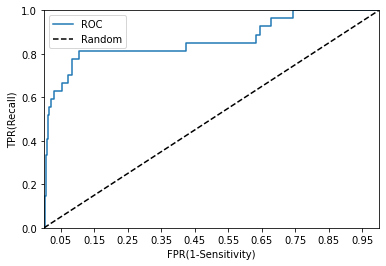

lda의 ROC AUC값: 0.8635


In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(Ela_UO_y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(Ela_UO_y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(Ela_UO_y_test, lda_clf.predict_proba(Ela_UO_x_test)[:,1])
pred_proba = lda_clf.predict_proba(Ela_UO_x_test)[:,1]
roc_score = roc_auc_score(Ela_UO_y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


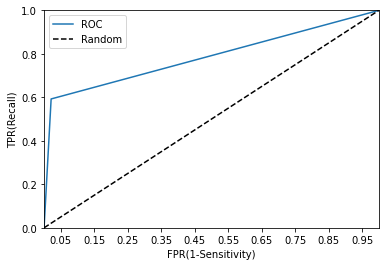

lda의 ROC AUC값: 0.7858


In [43]:
roc_curve_plot(Ela_UO_y_test, lda_clf.predict(Ela_UO_x_test))
roc_score = roc_auc_score(Ela_UO_y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

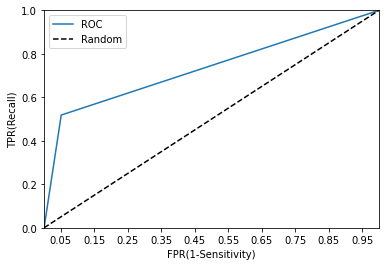

dt ROC AUC값: 0.7337


In [44]:
roc_curve_plot(Ela_UO_y_test, dt_clf.predict_proba(Ela_UO_x_test)[:,1])
pred_proba = dt_clf.predict_proba(Ela_UO_x_test)[:,1]
roc_score = roc_auc_score(Ela_UO_y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


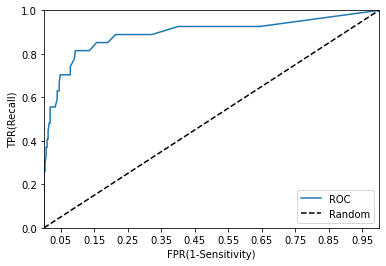

rf ROC AUC값: 0.8941


In [45]:
roc_curve_plot(Ela_UO_y_test, rf_clf.predict_proba(Ela_UO_x_test)[:,1])
pred_proba = rf_clf.predict_proba(Ela_UO_x_test)[:,1]
roc_score = roc_auc_score(Ela_UO_y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

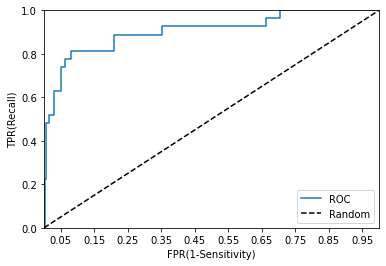

lr ROC AUC값: 0.9037


In [46]:
roc_curve_plot(Ela_UO_y_test, lr_clf.predict_proba(Ela_UO_x_test)[:,1])
pred_proba = lr_clf.predict_proba(Ela_UO_x_test)[:,1]
roc_score = roc_auc_score(Ela_UO_y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

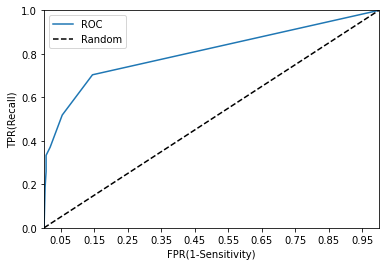

knn ROC AUC값: 0.8052


In [47]:
roc_curve_plot(Ela_UO_y_test, knn_clf.predict_proba(Ela_UO_x_test)[:,1])
pred_proba = knn_clf.predict_proba(Ela_UO_x_test)[:,1]
roc_score = roc_auc_score(Ela_UO_y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))